In [104]:
## importing important libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns


In [105]:
data=pd.read_csv("financial_data.csv")
data

,Unnamed: 0,timestamp,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
0,0,2024-01-26 19:55:00,404.100,404.150,404.000,404.030,1549
1,1,2024-01-26 19:50:00,403.950,404.100,403.910,404.005,552
2,2,2024-01-26 19:45:00,404.000,404.030,403.950,403.960,1313
3,3,2024-01-26 19:40:00,404.020,404.100,403.900,404.000,892
4,4,2024-01-26 19:35:00,404.020,404.150,403.950,404.020,243
...,...,...,...,...,...,...,...
95,95,2024-01-26 12:00:00,405.680,405.960,405.540,405.935,107289
96,96,2024-01-26 11:55:00,405.625,406.010,405.570,405.670,171398
97,97,2024-01-26 11:50:00,405.540,405.790,405.450,405.630,157393
98,98,2024-01-26 11:45:00,404.790,405.551,404.590,405.551,138330


#### understanding the data
###### data have two important feature 
1. Meta data : description of the data
2. Time Series data (which contains the main data)
3. this data taken from the 26 january 2024 with different time of the day.

### Description of the data
1. OpenPrice : The opening price for a stock is the price it trades immediately after the stock market opens 
2. close price :The closing price is the last price at which a security traded during the regular trading day.
3. low price: lowest price reported in troughout the day
4. high price : highest price reported in throughout the day
5. volume : total stocks sells on that specific time and date

In [106]:
## deleting the unnamed :0 (because it is useless for data analysis)
data = data.drop('Unnamed: 0', axis=1)

In [107]:
data

,timestamp,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
0,2024-01-26 19:55:00,404.100,404.150,404.000,404.030,1549
1,2024-01-26 19:50:00,403.950,404.100,403.910,404.005,552
2,2024-01-26 19:45:00,404.000,404.030,403.950,403.960,1313
3,2024-01-26 19:40:00,404.020,404.100,403.900,404.000,892
4,2024-01-26 19:35:00,404.020,404.150,403.950,404.020,243
...,...,...,...,...,...,...
95,2024-01-26 12:00:00,405.680,405.960,405.540,405.935,107289
96,2024-01-26 11:55:00,405.625,406.010,405.570,405.670,171398
97,2024-01-26 11:50:00,405.540,405.790,405.450,405.630,157393
98,2024-01-26 11:45:00,404.790,405.551,404.590,405.551,138330


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   100 non-null    object 
 1   OpenPrice   100 non-null    float64
 2   HighPrice   100 non-null    float64
 3   LowPrice    100 non-null    float64
 4   ClosePrice  100 non-null    float64
 5   Volume      100 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


# Data Assessing
## dirty data
1. there is no null values
2. there is no duplicated values
3. there can be outlier in volume column.


In [109]:
data.duplicated().sum()

0

In [110]:
data.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,403.845310,404.054240,403.616940,403.831820,1.461000e+05
std,0.688284,0.738436,0.856504,0.686467,6.588408e+05
min,402.534000,402.820000,398.511000,402.510000,1.480000e+02
25%,403.397500,403.675000,403.147500,403.415000,1.283000e+03
50%,403.745000,403.927500,403.555000,403.720000,8.397550e+04
75%,404.020000,404.135000,403.930000,404.001250,1.284842e+05
max,405.945000,406.695000,405.720000,405.935000,6.572637e+06


In [111]:
## I have to separate the date time colume into date and time
data['date'] = pd.to_datetime(data['timestamp']).dt.date
data['time'] = pd.to_datetime(data['timestamp']).dt.time

In [112]:
data=data.drop({'timestamp', "date"}, axis=1) 

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   100 non-null    float64
 1   HighPrice   100 non-null    float64
 2   LowPrice    100 non-null    float64
 3   ClosePrice  100 non-null    float64
 4   Volume      100 non-null    int64  
 5   time        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


In [114]:
data


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,time
0,404.100,404.150,404.000,404.030,1549,19:55:00
1,403.950,404.100,403.910,404.005,552,19:50:00
2,404.000,404.030,403.950,403.960,1313,19:45:00
3,404.020,404.100,403.900,404.000,892,19:40:00
4,404.020,404.150,403.950,404.020,243,19:35:00
...,...,...,...,...,...,...
95,405.680,405.960,405.540,405.935,107289,12:00:00
96,405.625,406.010,405.570,405.670,171398,11:55:00
97,405.540,405.790,405.450,405.630,157393,11:50:00
98,404.790,405.551,404.590,405.551,138330,11:45:00


C:\Users\MOITRYEE\AppData\Local\anaconda3\python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='OpenPrice', ylabel='Count'>

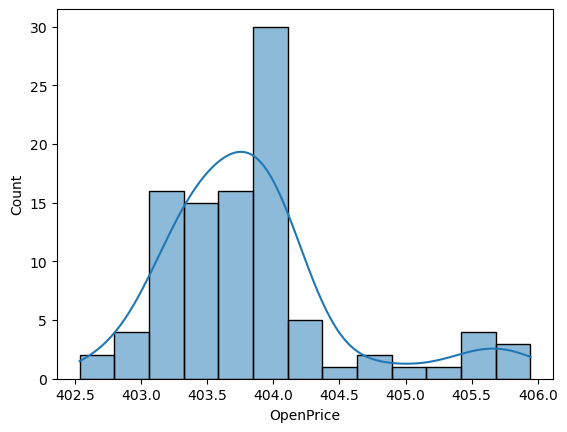

In [115]:
#univariate analysis
sns.histplot(x="OpenPrice", data=data, kde= True )
## several time a week open price is 404.0 it is around 30 times

C:\Users\MOITRYEE\AppData\Local\anaconda3\python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HighPrice', ylabel='Count'>

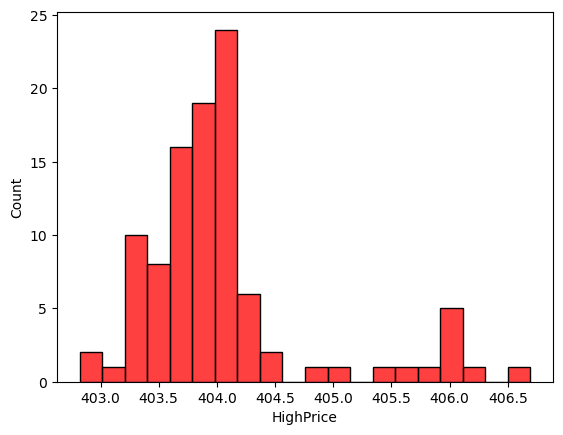

In [116]:
sns.histplot(x='HighPrice', color="red" , data=data)
## high price is of range 404.0- 404.5 which came majority of the time in the day

In [117]:
data.columns

Index(['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'time'], dtype='object')

C:\Users\MOITRYEE\AppData\Local\anaconda3\python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


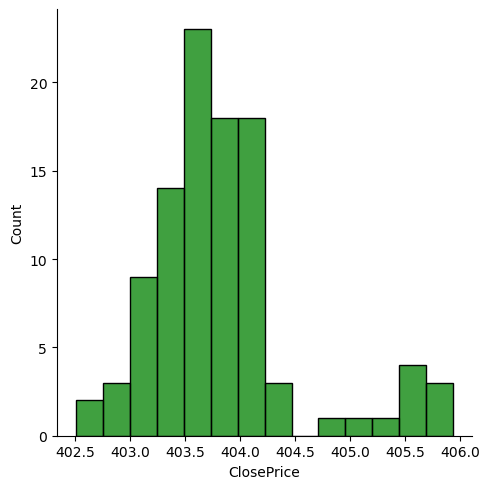

In [118]:
sns.displot(x='ClosePrice', color="green" , data=data)
# the close price is between the 403 - 404

<Axes: xlabel='OpenPrice', ylabel='HighPrice'>

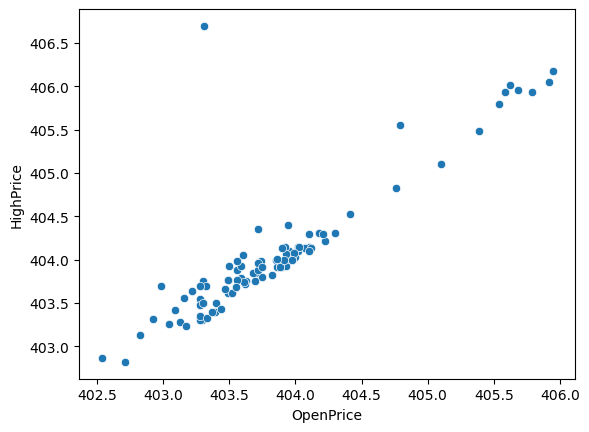

In [119]:
## bivariate analysis
## numerical - numerical column
sns.scatterplot(x="OpenPrice", y= 'HighPrice', data=data)
## there is positive correlation ovarall and it is densily populated in the 403.3- 404.5 

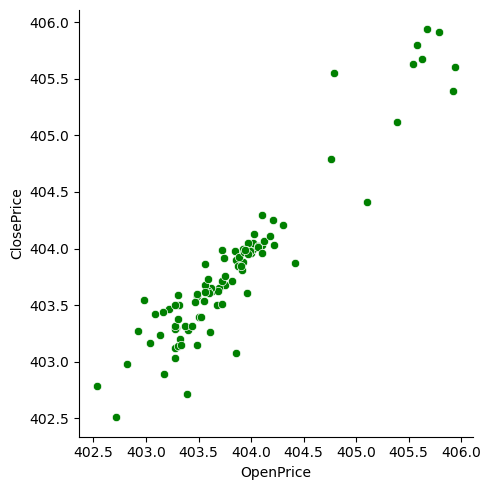

In [120]:
sns.relplot(x="OpenPrice", y="ClosePrice" , data = data, color = "green")

In [121]:
data.columns

Index(['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'time'], dtype='object')

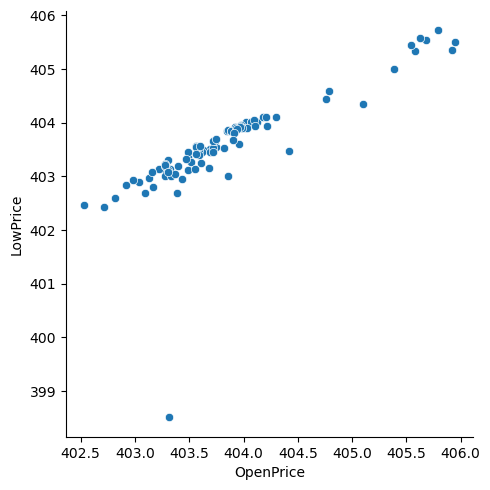

In [122]:
sns.relplot(x="OpenPrice", y="LowPrice",data=data, kind = "scatter")
## there is a positive relationship between the two features 

In [123]:
data["Volume"].median()

83975.5

In [124]:
data.columns

Index(['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'time'], dtype='object')

## we are making catagories of the volume columns for better analysis
### here we are considering catagories columns as dependent or target column


In [125]:
# Define category boundaries (example)
bins = [0, 100, 10000, 20000, 100000, 300000]
category_labels = ['Low', 'Medium Low', 'Medium High', 'High', "VeryHigh"]

# Create categories using pd.cut
data['category'] = pd.cut(data['Volume'], bins, labels=category_labels)

print(data)


    OpenPrice  HighPrice  LowPrice  ClosePrice  Volume      time    category
0     404.100    404.150   404.000     404.030    1549  19:55:00  Medium Low
1     403.950    404.100   403.910     404.005     552  19:50:00  Medium Low
2     404.000    404.030   403.950     403.960    1313  19:45:00  Medium Low
3     404.020    404.100   403.900     404.000     892  19:40:00  Medium Low
4     404.020    404.150   403.950     404.020     243  19:35:00  Medium Low
..        ...        ...       ...         ...     ...       ...         ...
95    405.680    405.960   405.540     405.935  107289  12:00:00    VeryHigh
96    405.625    406.010   405.570     405.670  171398  11:55:00    VeryHigh
97    405.540    405.790   405.450     405.630  157393  11:50:00    VeryHigh
98    404.790    405.551   404.590     405.551  138330  11:45:00    VeryHigh
99    404.760    404.830   404.448     404.795  177353  11:40:00    VeryHigh

[100 rows x 7 columns]


C:\Users\MOITRYEE\AppData\Local\anaconda3\python\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='category', ylabel='count'>

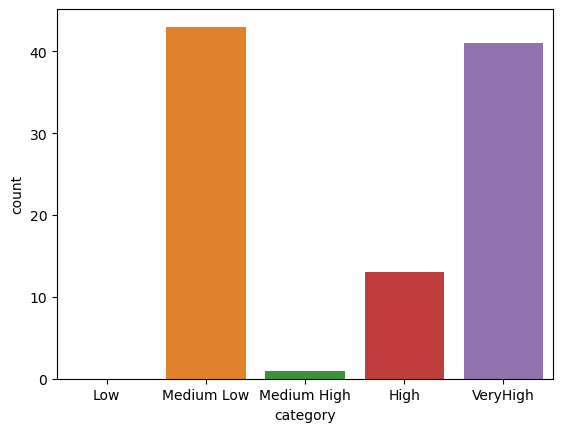

In [126]:
sns.countplot(data=data, x="category")
## mainly we can see that medium low and very high volumns are majority in counts 
# mainly in range (100-10000 and 100000-300000)

In [127]:
data.columns

Index(['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'time',
       'category'],
      dtype='object')

In [128]:
#deleting because we have creating the category out of it and there is no use of volume column
data.drop("Volume", axis=1, inplace = True)
data.drop("time", axis=1, inplace=True)

C:\Users\MOITRYEE\AppData\Local\anaconda3\python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MOITRYEE\AppData\Local\anaconda3\python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='category', ylabel='OpenPrice'>

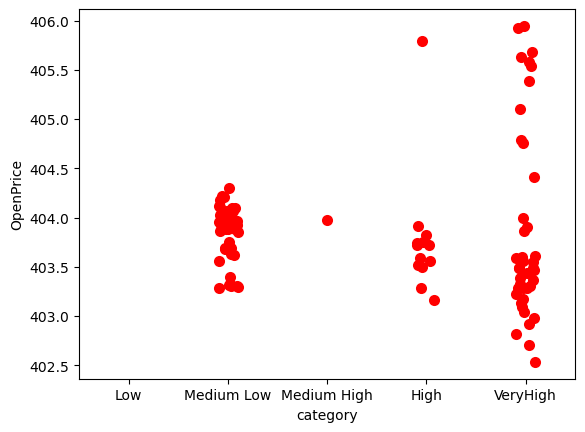

In [129]:
sns.stripplot(y="OpenPrice", x="category",data=data,size=8, color= "red")
#all most at all open prices very high that is ranges of 100000-300000 have been bought

C:\Users\MOITRYEE\AppData\Local\anaconda3\python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MOITRYEE\AppData\Local\anaconda3\python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MOITRYEE\AppData\Local\anaconda3\python\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='category', ylabel='HighPrice'>

C:\Users\MOITRYEE\AppData\Local\anaconda3\python\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


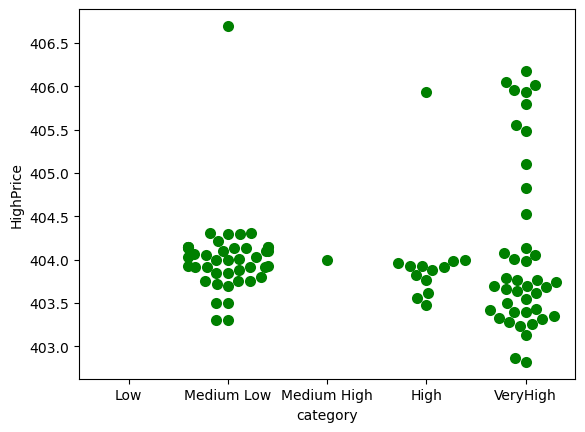

In [130]:
sns.swarmplot(y="HighPrice", x="category",data=data,size=8, color= "green")
#all most at all high prices very high that is ranges of 100000-300000 volumes have been bought

In [131]:
## analysis with help of groupby function
grouped=data.groupby("category")

C:\Users\MOITRYEE\AppData\Local\Temp\ipykernel_11076\1792065111.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=data.groupby("category")


In [132]:
grouped.count()
## majority of times median low and veryhigh are coming

,OpenPrice,HighPrice,LowPrice,ClosePrice
category,,,,
Low,0,0,0,0
Medium Low,43,43,43,43
Medium High,1,1,1,1
High,13,13,13,13
VeryHigh,41,41,41,41


In [133]:
grouped.mean()
## in all cases mean are is near to 403-404

,OpenPrice,HighPrice,LowPrice,ClosePrice
category,,,,
Low,NaN,NaN,NaN,NaN
Medium Low,403.842233,404.021628,403.622349,403.831744
Medium High,403.970000,403.990000,403.920000,403.950000
High,403.773846,403.981538,403.635231,403.777308
VeryHigh,403.868902,404.097415,403.594024,403.838585


In [134]:
grouped.std()
## with negligible standered deviation

,OpenPrice,HighPrice,LowPrice,ClosePrice
category,,,,
Low,NaN,NaN,NaN,NaN
Medium Low,0.286724,0.484146,0.856934,0.298271
Medium High,NaN,NaN,NaN,NaN
High,0.641139,0.608863,0.660797,0.666742
VeryHigh,0.979596,0.991063,0.953242,0.967947
